#                      House Price Predictions

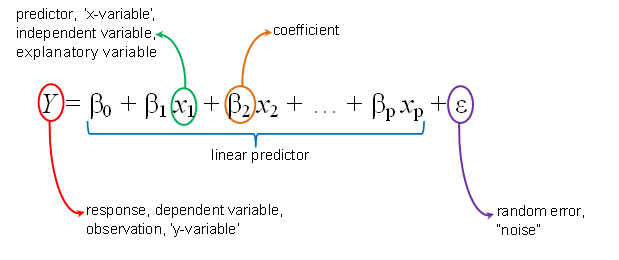

<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"style="background-color:#5EAFF2; color:#FFE200">Table of Contents</h3>
<ul class="nav flex-column">
  <li class="nav-item">    
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#lib" role="tab" aria-controls="profile"style="color:#ff4f00">Libraries<span class="badge badge-primary badge-pill">1</span></a>         <li class="nav-item">
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#data" role="tab" aria-controls="profile">Data<span class="badge badge-primary badge-pill">2</span></a>  
  <li class="nav-item">  
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#eda" role="tab" aria-controls="profile"style="color:#ff4f00">EDA<span class="badge badge-primary badge-pill">3</span></a> 
  <li class="nav-item">
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#viz" role="tab" aria-controls="profile">Visualizations<span class="badge badge-primary badge-pill">4</span></a>
  <li class="nav-item">  
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#map" role="tab" aria-controls="profile">MAP<span class="badge badge-primary badge-pill">4.1</span></a>
  <li class="nav-item">  
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#fimp" role="tab" aria-controls="profile"style="color:#ff4f00">Feature Importance<span class="badge badge-primary badge-pill">5</span></a>
  <li class="nav-item">  
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#drop" role="tab" aria-controls="profile">Dropping Influencers<span class="badge badge-primary badge-pill">6</span></a>
  <li class="nav-item">  
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#model" role="tab" aria-controls="profile"style="color:#ff4f00">Model Function<span class="badge badge-primary badge-pill">7</span></a>
  <li class="nav-item">  
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#res1" role="tab" aria-controls="profile">Results With 6 Highly Corelated features<span class="badge badge-primary badge-pill">8</span></a>
  <li class="nav-item">  
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#res2" role="tab" aria-controls="profile"style="color:#ff4f00">Results With 8 features<span class="badge badge-primary badge-pill">9</span></a>
  <li class="nav-item">  
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#res3" role="tab" aria-controls="profile">Results With all features<span class="badge badge-primary badge-pill">10</span></a>
  <li class="nav-item">  
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#norm" role="tab" aria-controls="profile"style="color:#ff4f00">Results With normalized features<span class="badge badge-primary badge-pill">11</span></a>
  <li class="nav-item">
</ul>

# <a id="lib">1. Libraries📖</a>

In [ ]:
import warnings
import seaborn as sns
sns.set(context="notebook", style="darkgrid", palette="deep", color_codes=True, font="sans- serif", font_scale=1,)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
warnings.filterwarnings("ignore")
from sklearn import linear_model
from xgboost import XGBRegressor
from statsmodels.api import OLS
import matplotlib.pyplot as plt
from sklearn import metrics
from colorama import Fore
import pandas as pd

# <a id="data">2. Data💼</a>

In [ ]:
data = pd.read_csv("../input/housesalesprediction/kc_house_data.csv")
data.head()

# <a id="eda">3. Basic EDA🪔</a>

In [ ]:
data.isnull().sum()

In [ ]:
data.columns

In [ ]:
data.info()

Creating a copy of Original dataset

In [ ]:
cc = data.copy()

In [ ]:
clean_date = []
for i,j in enumerate(cc["date"]):
    a = j[:-7]
    clean_date.append(a)
cc["clean_date"] =  clean_date
cc = cc.drop(["date","id"],axis=1)
cc.head()  

In [ ]:
cc["clean_date"] = cc["clean_date"].astype(str).astype(int)

In [ ]:
cc.info()

In [ ]:
cc.columns

In [ ]:
cc.corr()

# <a id = "viz">4. Visualizations👓📈📉📊</a>

In [ ]:
plt.figure(figsize  = (15,6))
sns.heatmap(cc.isnull(),cmap="viridis")

In [ ]:
# Compute the correlation matrix
import numpy as np
mask = np.zeros_like(cc.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 
corr = cc.corr()
plt.figure(figsize=(15, 18))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=0.8, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True,mask=mask,annot_kws={"size":8},linecolor='g')
plt.tight_layout()
plt.show()

In [ ]:
feature_1= ['price','sqft_living15','lat','sqft_basement','grade', 'sqft_above','bedrooms', 'bathrooms', 'sqft_living']

sns.pairplot(data=cc[feature_1], palette='tab20')

In [ ]:
def Box(a):
    plt.figure(figsize=(16,4))
    sns.boxplot(x=cc[a])
    plt.title("Boxplot")
    plt.show()

col = cc.columns
for i,j in enumerate(col):
    Box(col[i])

In [ ]:
def countplot(a):
    plt.figure(figsize=(15,6))
    sns.countplot(data=cc,x=cc[a],order=cc[a].value_counts().index)

feature_2 = ["bedrooms","bathrooms","grade","floors"]
for i,j in enumerate(feature_2):
    countplot(feature_2[i])
    

In [ ]:
def dist(a):
    plt.figure(figsize=(16,6))
    sns.distplot(cc[a],hist=True,kde=True,rug=False,label=a,norm_hist=True,color="r")
    plt.show()
    
col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built',
       'sqft_living15', 'sqft_lot15']
for i,x in  enumerate(col):
    dist(col[i])

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(data=cc,x="price",y="sqft_above")
plt.title("house prices by sqft_above")
plt.xlabel('sqft_above')
plt.ylabel('house prices')
plt.legend()

In [ ]:
h = cc.hist(bins=20,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15,color="r")
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

In [ ]:
plt.figure(figsize=(16,6))
facet = sns.FacetGrid(cc,hue="bedrooms",aspect=4)
facet.map(sns.kdeplot,"price",shade=True)
facet.add_legend()
plt.title("grade")

In [ ]:
def boxp(a):
    plt.figure(figsize = (16,5))
    sns.boxplot(x=cc[a],y=cc["price"])
fea_3  =["bedrooms","grade","bathrooms",'waterfront',"view",]
for i, j in enumerate(fea_3):
    boxp(fea_3[i])

In [ ]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1,1,1,projection="3d")
ax.scatter(cc["view"],cc["grade"],cc["yr_built"],color="green",alpha=0.6)
ax.set(xlabel='\nView',ylabel='\nGrade',zlabel='\nYear Built');

In [ ]:
plt.figure(figsize=(15,5))
a= sns.FacetGrid(data=cc,hue="condition",aspect=0.5,size=15)
a.map(plt.scatter,"sqft_living", "price")
plt.legend(loc="best")
plt.show()

In [ ]:
g = sns.factorplot(x="yr_built", y = "price", data=cc[cc['price'] < 1000000], size= 7, aspect = 2, kind="box" )
g.set_xticklabels(rotation=90)
plt.show()

# <a id="map">4.1. Map🗺🌍</a>

In [ ]:
import folium
from folium.plugins import HeatMap
maxpr = cc.loc[cc["price"].idxmax()]

def generateBaseMap(default_location=[47.7210,-122.319],default_zoom_start=10):
    base_map = folium.Map(location=default_location,zoom_start=default_zoom_start,control_scale=True)
    return base_map
df_copy = cc.copy()
# select a zipcode for the heatmap
#set(df['zipcode'])
#df_copy = df[df['zipcode']==98001].copy()
df_copy['count'] = 1
basemap = generateBaseMap()
# add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the house which has the highest price
folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),icon=folium.Icon(color='green')).add_to(s)
# add heatmap
HeatMap(data=df_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(), radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap

# <a id="fimp">5. Feature Importance💎</a>

 <button type="button" class="btn btn-success"><a href="https://www.youtube.com/watch?v=EqLBAmtKMnQ"><p style="color:black"><b>1st Reference</b></p></a> <span class="badge"></span></button>
<button type="button" class="btn btn-success"><a href="https://machinelearningmastery.com/calculate-feature-importance-with-python/"><p style="color:yellow"><b>2nd Reference</b></p></a> <span class="badge"></span></button>

In [ ]:
## XGBRegressor
X = cc.drop(["price"],axis=1)
Y = cc["price"]

model = XGBRegressor()
model.fit(X,Y)

feature_importance = pd.Series(model.feature_importances_,index=X.columns)
feature_importance = pd.DataFrame(feature_importance,columns=["Score"])
feature_importance = feature_importance.sort_values(["Score"])

plt.figure(figsize=(15,6))
sns.barplot(y = feature_importance.index, x=feature_importance.Score)
plt.title("Best features plot by using XGBRegressor method")
plt.show()

##  DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X,Y)

feature_importance = pd.Series(model.feature_importances_,index=X.columns)
feature_importance = pd.DataFrame(feature_importance,columns=["Score"])
feature_importance = feature_importance.sort_values(["Score"])

plt.figure(figsize=(15,6))
sns.barplot(y = feature_importance.index, x=feature_importance.Score)
plt.title("Best features plot by using DecisionTreeRegressor method")
plt.show()

## SelectKBest
k1 = SelectKBest(score_func = f_classif, k='all')

fit1 = k1.fit(X,Y)
feature_importance = pd.Series(fit1.scores_,index=X.columns)
feature_importance = pd.DataFrame(feature_importance,columns=["Score"])
feature_importance = feature_importance.sort_values(["Score"])

plt.figure(figsize=(15,6))
sns.barplot(y = feature_importance.index, x=feature_importance.Score)
plt.title("Best features plot by using SelectKBest method")
plt.show()

# <a id="drop">6. Dropping Influencers☝</a>

In [ ]:
cc = cc.drop(cc.index[[3914,7252,12777,15870]])

# <a id="model">7. Model Function✈🚀</a>

Here I am creating a function which will give you the result of 6 models.

**Models are : OLS, Sklearn Linear, Ridge, Ploynimial(Degree = 2), Ploynimial(Degree = 3),Decision Tree Regressor**

In [ ]:
def Model_Result(x,y,m):
    X_1 = x
    y_1 = y
    X1_train,X1_test,y1_train,y1_test = train_test_split(X_1,y_1,test_size=0.3,random_state=123)
    print("Shape of X_train : {}\nShape of X_test : {}\nShape of y_train : {}\nShape of y_test : {}\n".format(X1_train.shape,X1_test.shape,y1_train.shape,y1_test.shape))
    
    Root_mean_squared_Error = []
    mean_absolute_Error = []
    mean_squared_Error = []
    r2 = []
    Adj_r2 = []
   
    ## OLS method
    print(Fore.WHITE + "Result with OLS method :")
    model_1 = OLS(y1_train,X1_train).fit()
    print(model_1.summary())
    pred_1 = model_1.predict(X1_test)
    
    Root_mean_squared_error = np.sqrt(metrics.mean_squared_error(y1_test,pred_1))
    Root_mean_squared_Error.append(Root_mean_squared_error) 
                                      
    mean_absolute_error = metrics.mean_absolute_error(y1_test, pred_1) 
    mean_absolute_Error.append(mean_absolute_error)    
                                      
    mean_squared_error = metrics.mean_squared_error(y1_test, pred_1) 
    mean_squared_Error.append(mean_squared_error)   
                                      
    R2 = r2_score(y1_test, pred_1)  
    r2.append(R2)        
                                      
    Adj_R2 = 1-(1-R2)*(len(y1_test)-1)/(len(y1_test)-m-1) 
    Adj_r2.append(Adj_R2)
                                      
    print("Report of Testing data : \n")
    print('Root Mean Squared Error:', float(format(np.sqrt(metrics.mean_squared_error(y1_test,pred_1)),'.3f')))
    print('Mean Absolute Error:', float(format(metrics.mean_absolute_error(y1_test, pred_1),".3f")))
    print('Mean Squared Error:', float(format(metrics.mean_squared_error(y1_test, pred_1),".3f")))
    print("R2 :",float(format(r2_score(y1_test, pred_1),'.3f')))
    print("Adjusted R2 :",float(format(1-(1-R2)*(len(y1_test)-1)/(len(y1_test)-m-1),".3f")))
    print("\n")
    
    ## Sklearn Linear Regression method
    print(Fore.RED + "Result with Sklearn Linear Regression method :")
    model_2 = LinearRegression()
    model_2.fit(X1_train,y1_train)
    pred_2 = model_2.predict(X1_test)
    
    Root_mean_squared_error = np.sqrt(metrics.mean_squared_error(y1_test,pred_2))
    Root_mean_squared_Error.append(Root_mean_squared_error) 
                                      
    mean_absolute_error = metrics.mean_absolute_error(y1_test, pred_2) 
    mean_absolute_Error.append(mean_absolute_error)    
                                      
    mean_squared_error = metrics.mean_squared_error(y1_test, pred_2) 
    mean_squared_Error.append(mean_squared_error)   
                                      
    R2 = r2_score(y1_test, pred_2)  
    r2.append(R2)        
                                      
    Adj_R2 = 1-(1-R2)*(len(y1_test)-1)/(len(y1_test)-m-1) 
    Adj_r2.append(Adj_R2)
    
    print("Report of Testing data : \n")
    print('Root Mean Squared Error:', float(format(np.sqrt(metrics.mean_squared_error(y1_test,pred_2)),'.3f')))
    print('Mean Absolute Error:', float(format(metrics.mean_absolute_error(y1_test, pred_2),".3f")))
    print('Mean Squared Error:', float(format(metrics.mean_squared_error(y1_test, pred_2),".3f")))
    print("R2 :",float(format(r2_score(y1_test, pred_2),'.3f')))
    print("Adjusted R2 :",float(format(1-(1-R2)*(len(y1_test)-1)/(len(y1_test)-m-1),".3f")))
    print("\n")
    
    ## Ridge regression technique (Regularization)
    print(Fore.BLUE + "Result with Ridge regression technique :")
    model_3 = linear_model.Ridge(alpha=100)
    model_3.fit(X1_train,y1_train)
    pred_3 = model_3.predict(X1_test)
    
    Root_mean_squared_error = np.sqrt(metrics.mean_squared_error(y1_test,pred_3))
    Root_mean_squared_Error.append(Root_mean_squared_error) 
                                      
    mean_absolute_error = metrics.mean_absolute_error(y1_test, pred_3) 
    mean_absolute_Error.append(mean_absolute_error)    
                                      
    mean_squared_error = metrics.mean_squared_error(y1_test, pred_3) 
    mean_squared_Error.append(mean_squared_error)   
                                      
    R2 = r2_score(y1_test, pred_3)  
    r2.append(R2)        
                                      
    Adj_R2 = 1-(1-R2)*(len(y1_test)-1)/(len(y1_test)-m-1) 
    Adj_r2.append(Adj_R2)
    
    print("Report of Testing data : \n")
    print('Root Mean Squared Error:', float(format(np.sqrt(metrics.mean_squared_error(y1_test,pred_3)),'.3f')))
    print('Mean Absolute Error:', float(format(metrics.mean_absolute_error(y1_test, pred_3),".3f")))
    print('Mean Squared Error:', float(format(metrics.mean_squared_error(y1_test, pred_3),".3f")))
    print("R2 :",float(format(r2_score(y1_test, pred_3),'.3f')))
    print("Adjusted R2 :",float(format(1-(1-R2)*(len(y1_test)-1)/(len(y1_test)-m-1),".3f")))
    print("\n")
    
    ## Polynomial Regression(degree=2)
    print(Fore.YELLOW + "Result with Polynomial Regression (degree=2):")
    polyfeat = PolynomialFeatures(degree=2)
    X_trainpoly = polyfeat.fit_transform(X1_train)
    X_testpoly = polyfeat.fit_transform(X1_test)
    model_4 = linear_model.LinearRegression().fit(X_trainpoly, y1_train)
    pred_4 = model_4.predict(X_testpoly)
    
    Root_mean_squared_error = np.sqrt(metrics.mean_squared_error(y1_test,pred_4))
    Root_mean_squared_Error.append(Root_mean_squared_error) 
                                      
    mean_absolute_error = metrics.mean_absolute_error(y1_test, pred_4) 
    mean_absolute_Error.append(mean_absolute_error)    
                                      
    mean_squared_error = metrics.mean_squared_error(y1_test, pred_4) 
    mean_squared_Error.append(mean_squared_error)   
                                      
    R2 = r2_score(y1_test, pred_4)  
    r2.append(R2)        
                                      
    Adj_R2 = 1-(1-R2)*(len(y1_test)-1)/(len(y1_test)-m-1) 
    Adj_r2.append(Adj_R2)
    
    print("Report of Testing data : \n")
    print('Root Mean Squared Error:', float(format(np.sqrt(metrics.mean_squared_error(y1_test,pred_4)),'.3f')))
    print('Mean Absolute Error:', float(format(metrics.mean_absolute_error(y1_test, pred_4),".3f")))
    print('Mean Squared Error:', float(format(metrics.mean_squared_error(y1_test, pred_4),".3f")))
    print("R2 :",float(format(r2_score(y1_test, pred_4),'.3f')))
    print("Adjusted R2 :",float(format(1-(1-R2)*(len(y1_test)-1)/(len(y1_test)-m-1),".3f")))
    print("\n")
    
    ## Polynomial Regression(degree=3)
    print(Fore.MAGENTA + "Result with Polynomial Regression (degree=3):")
    polyfeat3 = PolynomialFeatures(degree=3)
    X_trainpoly = polyfeat3.fit_transform(X1_train)
    X_testpoly = polyfeat3.fit_transform(X1_test)
    model_5 = linear_model.LinearRegression().fit(X_trainpoly, y1_train)
    pred_5 = model_5.predict(X_testpoly)
    
    Root_mean_squared_error = np.sqrt(metrics.mean_squared_error(y1_test,pred_5))
    Root_mean_squared_Error.append(Root_mean_squared_error) 
                                      
    mean_absolute_error = metrics.mean_absolute_error(y1_test, pred_5) 
    mean_absolute_Error.append(mean_absolute_error)    
                                      
    mean_squared_error = metrics.mean_squared_error(y1_test, pred_5) 
    mean_squared_Error.append(mean_squared_error)   
                                      
    R2 = r2_score(y1_test, pred_5)  
    r2.append(R2)        
                                      
    Adj_R2 = 1-(1-R2)*(len(y1_test)-1)/(len(y1_test)-m-1) 
    Adj_r2.append(Adj_R2)
    
    print("Report of Testing data : \n")
    print('Root Mean Squared Error:', float(format(np.sqrt(metrics.mean_squared_error(y1_test,pred_5)),'.3f')))
    print('Mean Absolute Error:', float(format(metrics.mean_absolute_error(y1_test, pred_5),".3f")))
    print('Mean Squared Error:', float(format(metrics.mean_squared_error(y1_test, pred_5),".3f")))
    print("R2 :",float(format(r2_score(y1_test, pred_5),'.3f')))
    print("Adjusted R2 :",float(format(1-(1-R2)*(len(y1_test)-1)/(len(y1_test)-m-1),".3f")))
    print("\n")
    
    ## Decision Tree Regressor 
    print(Fore.CYAN + "Result with Decision Tree Regressor:")
    model_6 = DecisionTreeRegressor()
    model_6.fit(X1_train,y1_train)
    pred_6 = model_6.predict(X1_test)
    
    Root_mean_squared_error = np.sqrt(metrics.mean_squared_error(y1_test,pred_6))
    Root_mean_squared_Error.append(Root_mean_squared_error) 
                                      
    mean_absolute_error = metrics.mean_absolute_error(y1_test, pred_6) 
    mean_absolute_Error.append(mean_absolute_error)    
                                      
    mean_squared_error = metrics.mean_squared_error(y1_test, pred_6) 
    mean_squared_Error.append(mean_squared_error)   
                                      
    R2 = r2_score(y1_test, pred_6)  
    r2.append(R2)        
                                      
    Adj_R2 = 1-(1-R2)*(len(y1_test)-1)/(len(y1_test)-m-1) 
    Adj_r2.append(Adj_R2)
    
    print("Report of Testing data : \n")
    print('Root Mean Squared Error:', float(format(np.sqrt(metrics.mean_squared_error(y1_test,pred_6)),'.3f')))
    print('Mean Absolute Error:', float(format(metrics.mean_absolute_error(y1_test, pred_6),".3f")))
    print('Mean Squared Error:', float(format(metrics.mean_squared_error(y1_test, pred_6),".3f")))
    print("R2 :",float(format(r2_score(y1_test, pred_6),'.3f')))
    print("Adjusted R2 :",float(format(1-(1-R2)*(len(y1_test)-1)/(len(y1_test)-m-1),".3f")))
    print("\n")
    
    
    ind = ["OLS","Sklearn_linear","Ridge","Poly_2","Poly_3","Decision_tree_regressor"]
    Result = pd.DataFrame()
    Result["Root_mean_squared_error"] = Root_mean_squared_Error  
    Result["mean_absolute_error"] = mean_absolute_Error
    Result["mean_squared_error"] = mean_squared_Error
    Result["R2"] = r2
    Result["Adj_R2"] =  Adj_r2   
    Result.index = ind
    
    return Result

# <a id="res1">8. Results with 6 Highly Corelated Features</a>

In [ ]:
Model_Result(cc[['bedrooms', 'bathrooms', 'sqft_living','grade', 'sqft_above','sqft_living15']],cc["price"],6)

# <a id="res2">9. Results with 8 Features</a>

In [ ]:
Model_Result(cc[['price', 'bedrooms', 'bathrooms',  'grade', 'sqft_above','sqft_basement','sqft_living15', 'sqft_lot15']],cc["price"],8)

# <a id="res3">10. Results with all Features</a>

In [ ]:
Model_Result(cc[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'clean_date']],cc["price"],19)

In [ ]:
##Normalization function
def norm_fun(i):
    x = (i-i.min())/(i.max()-i.min())
    return x
fea_n = cc[['bedrooms', 'bathrooms', 'sqft_living','grade', 'sqft_above','sqft_living15']]
Norm_feat = norm_fun(fea_n)
Norm_feat.head()

# <a id="norm">11. Results with Normalized features</a>

In [ ]:
Model_Result(Norm_feat,cc["price"],6)

* After analysing all the above results we can say that Ploynomial with 2 degree is giving the best result.

# Please Do give an Upvote If you liked the Notebook.

# 🥇🥈🥉🏅🏆

*Some visualizations of my notebook are inspired by the below notebook.*

<button type="button" class="btn btn-success"><a href="https://www.kaggle.com/burhanykiyakoglu/predicting-house-prices"><p style="color:yellow"><b>Reference</b></p></a> <span class="badge"></span></button>

<img src="https://media.giphy.com/media/JDTsqJhvLOq9G/giphy.gif">